In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# load the data
data_dir = os.getcwd() + '\\data\\'

data = pd.read_csv(data_dir + '1.csv', index_col='ms')

In [2]:
# Removing unnecessary columns
column_names = ['co2_1_tac', 'co2_1_sc', 'co2_2_tac', 'co2_2_sc', 
                'light_1_tac', 'light_1_sc','light_2_tac', 
                'light_2_sc', 'motion_tac', 'motion_sc', 'power_1_tac',
                'power_1_sc', 'power_2_tac', 'power_2_sc', 'sound_tac',
                'sound_sc', 'schedule_tac', 'schedule_sc']

data = data.drop(column_names, 1)

In [3]:
def rolling_sum(data, window_size = 4):
    ret = np.cumsum(data, dtype = float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret

def rolling_avg(data, window_size = 4):
    return rolling_sum(data, window_size) / window_size

def rolling_sum_sqr(data, window_size = 4):
    x = np.square(data)
    return rolling_sum(x, window_size)

def rolling_rms(data, window_size = 4):
    sqr = rolling_sum_sqr(data, window_size) / window_size
    avg = np.square(rolling_avg(data, window_size))
    vals = np.absolute(sqr - avg)
    return np.sqrt(vals)

In [4]:
column_names = ['co2_1_tav', 'co2_2_tav', 'light_1_tav', 'light_2_tav',  
                'motion_tav', 'power_1_tav', 'power_2_tav', 'sound_tav']


for col_name in column_names:
    for i in range(2,17):
        avg_col_name = col_name + '_avg_' + str(i)
        data[avg_col_name]= rolling_avg(data[col_name].tolist(), i)
        rms_col_name = col_name + '_rms_' + str(i)
        data[rms_col_name]= rolling_rms(data[col_name].tolist(), i)

In [5]:
def plot_chart(data, column_name, label, view_range = None):
 
    cols = ['time', column_name, 'schedule_tav']
    
    d = data[cols]
    d = d.set_index(['time'])
    
    plt.figure(figsize = (15,4))
    
    if view_range is None:
        p1 = d[column_name].plot()
        p2 = d['schedule_tav'].plot(secondary_y = True)
    else:
        p1 = d[column_name][view_range].plot()
        p2 = d['schedule_tav'][view_range].plot(secondary_y = True)
        
    p1.set_ylabel(label)
    #p1.set_xticks([])

    plt.gcf().autofmt_xdate()
    
    p2.margins(0, 0.1)
    p1.set_xlabel('Time')
    plt.show() 
    

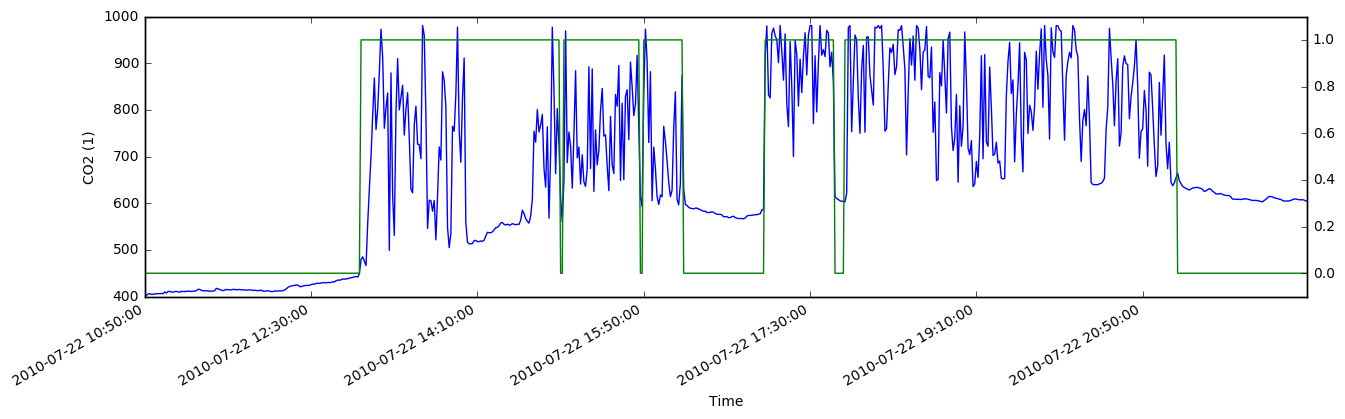

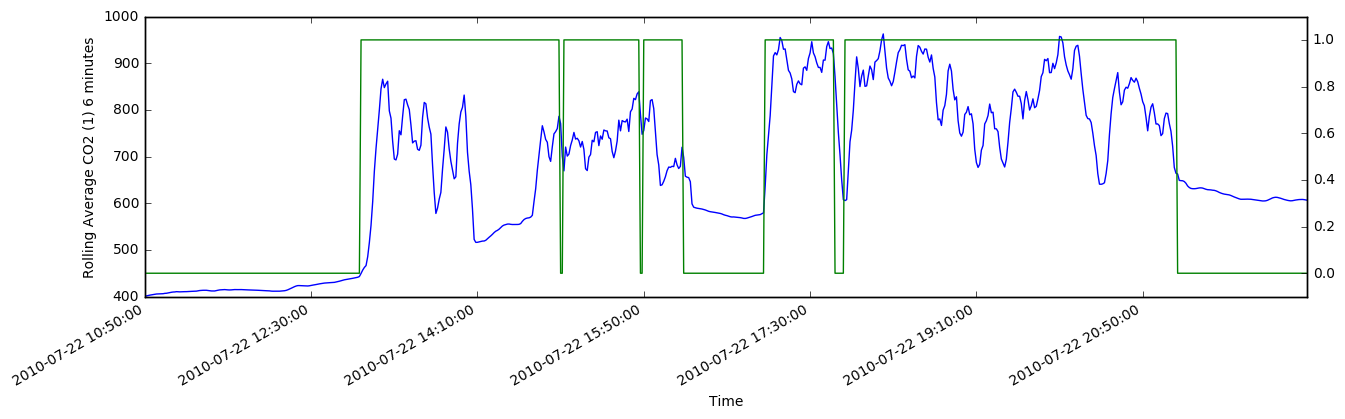

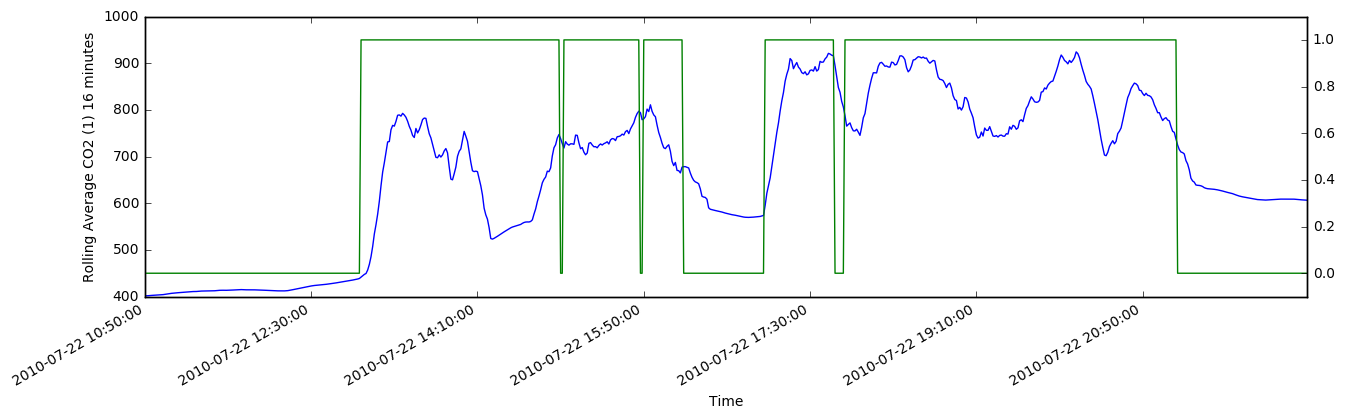

In [6]:
rang = np.arange(9300, 10000)
plot_chart(data, 'co2_1_tav', 'CO2 (1)', rang)
plot_chart(data, 'co2_1_tav_avg_6', 'Rolling Average CO2 (1) 6 minutes', rang)
plot_chart(data, 'co2_1_tav_avg_16', 'Rolling Average CO2 (1) 16 minutes', rang)

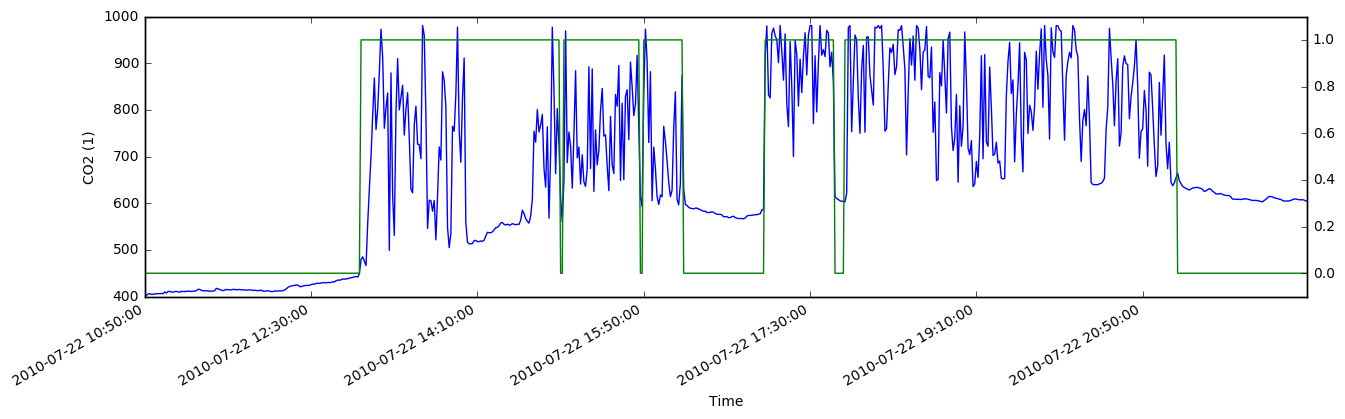

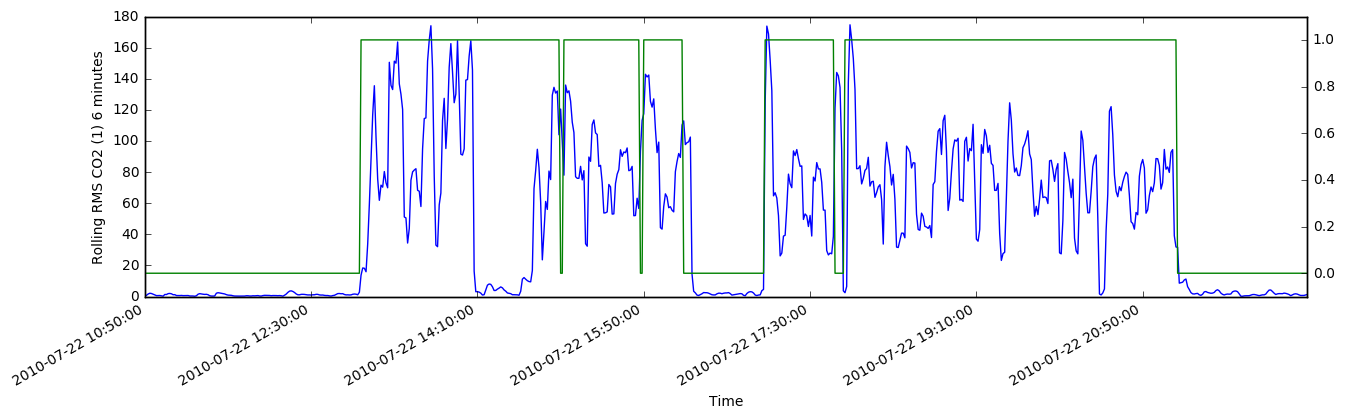

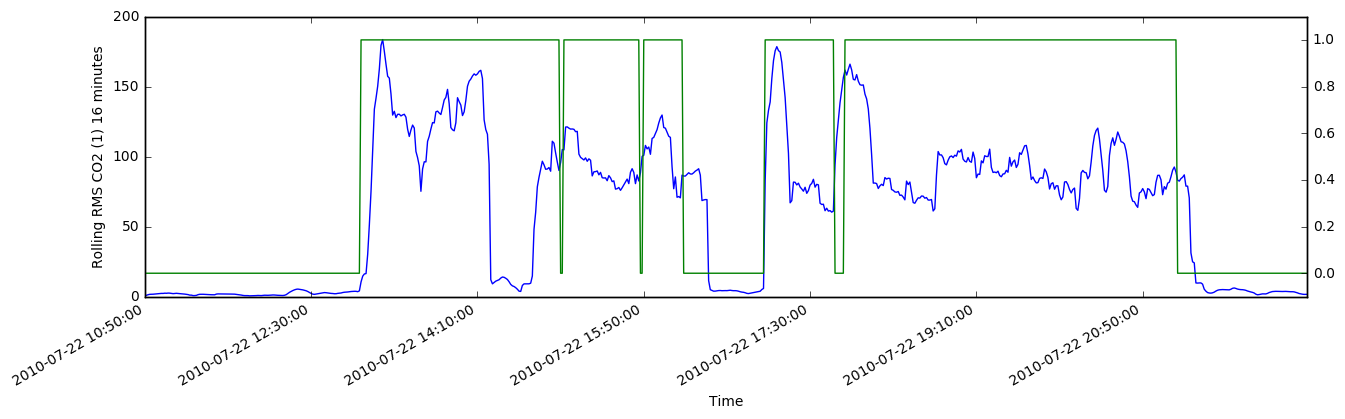

In [7]:
plot_chart(data, 'co2_1_tav', 'CO2 (1)', rang)
plot_chart(data, 'co2_1_tav_rms_6', 'Rolling RMS CO2 (1) 6 minutes', rang)
plot_chart(data, 'co2_1_tav_rms_16', 'Rolling RMS CO2 (1) 16 minutes', rang)

In [8]:
data.to_csv(data_dir + '3.csv', index = True)